In [3]:
# Install analysis packages
!pip install numpy scipy matplotlib pandas seaborn > /dev/null 2>&1
print("✓ Packages installed successfully!")

✓ Packages installed successfully!


In [4]:
#@title ### **Import Google Drive**
#@markdown Click in the "Run" buttom to make your Google Drive accessible.
from google.colab import drive

drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


📁 Reading from: /content/drive/MyDrive/NAMD-FEP/charmm-gui-6195586660/namd/1-2/ligand
Found 15 forward files, 15 backward files

📊 Forward windows:
  fep_forward_0.fep: 4.814 kcal/mol
  fep_forward_1.fep: 4.315 kcal/mol
  fep_forward_10.fep: -4.524 kcal/mol
  fep_forward_11.fep: -5.778 kcal/mol
  fep_forward_12.fep: -4.938 kcal/mol
  fep_forward_13.fep: -4.503 kcal/mol
  fep_forward_14.fep: -4.951 kcal/mol
  fep_forward_2.fep: 4.653 kcal/mol
  fep_forward_3.fep: 5.452 kcal/mol
  fep_forward_4.fep: 3.917 kcal/mol
  fep_forward_5.fep: 2.941 kcal/mol
  fep_forward_6.fep: 1.928 kcal/mol
  fep_forward_7.fep: -0.230 kcal/mol
  fep_forward_8.fep: -2.752 kcal/mol
  fep_forward_9.fep: -3.423 kcal/mol

📊 Backward windows:
  fep_backward_1.fep: -4.799 kcal/mol
  fep_backward_10.fep: 3.436 kcal/mol
  fep_backward_11.fep: 4.546 kcal/mol
  fep_backward_12.fep: 5.694 kcal/mol
  fep_backward_13.fep: 4.833 kcal/mol
  fep_backward_14.fep: 4.586 kcal/mol
  fep_backward_15.fep: 5.006 kcal/mol
  fep_backwa

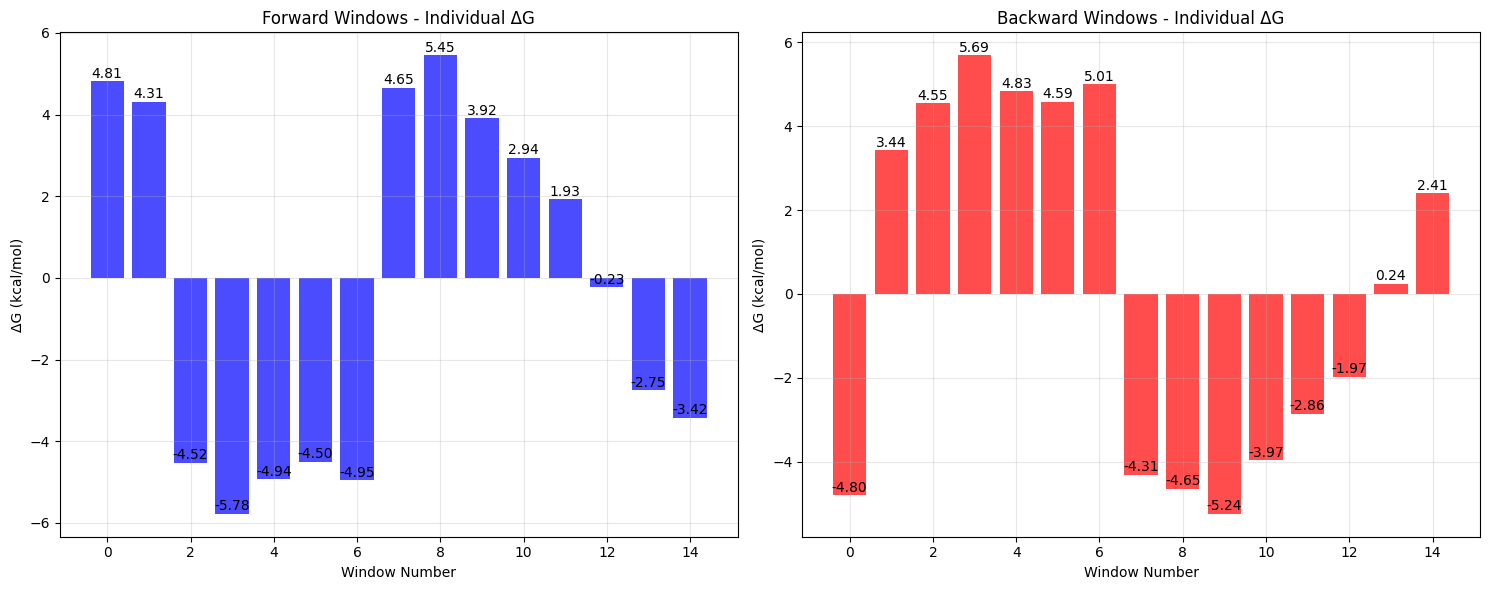

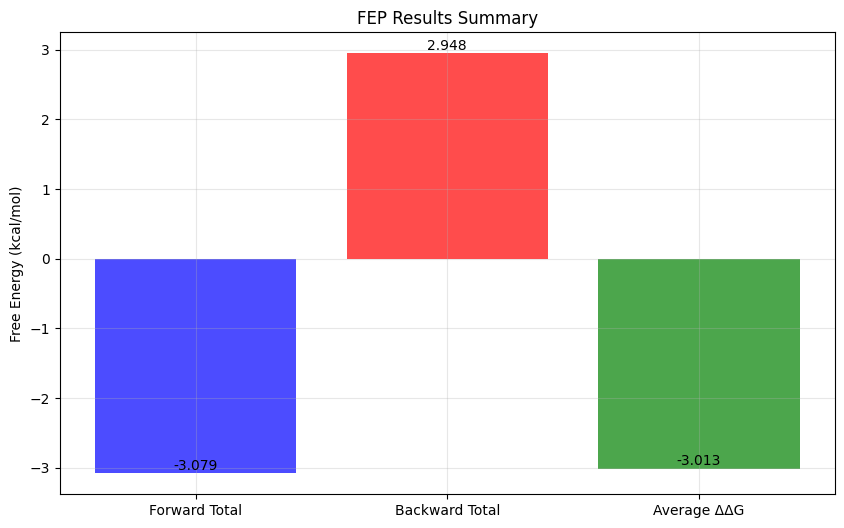


🔬 Final Solvent ΔΔG = -3.013 ± 0.065 kcal/mol


In [14]:
#@title Plot the general idea of individual fep lambda number
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# DEFINE YOUR PATH HERE
path = "/content/drive/MyDrive/NAMD-FEP/charmm-gui-6195586660/namd/1-2/ligand"

print(f"📁 Reading from: {path}")

def extract_final_dG(filename):
    """Extract the final cumulative ΔG from the last line of FEP file"""
    with open(filename, 'r') as f:
        for line in f:
            if 'Free energy change for lambda window' in line:
                parts = line.split()
                for i, part in enumerate(parts):
                    if part == 'is':
                        return float(parts[i + 1])
    return 0.0

# Get all forward and backward files
forward_files = sorted(glob.glob(os.path.join(path, 'fep_forward_*.fep')))
backward_files = sorted(glob.glob(os.path.join(path, 'fep_backward_*.fep')))

print(f"Found {len(forward_files)} forward files, {len(backward_files)} backward files")

# Extract final ΔG values
forward_dGs = []
backward_dGs = []

print("\n📊 Forward windows:")
for file in forward_files:
    dG = extract_final_dG(file)
    forward_dGs.append(dG)
    print(f"  {os.path.basename(file)}: {dG:.3f} kcal/mol")

print("\n📊 Backward windows:")
for file in backward_files:
    dG = extract_final_dG(file)
    backward_dGs.append(dG)
    print(f"  {os.path.basename(file)}: {dG:.3f} kcal/mol")

# Calculate totals
forward_total = sum(forward_dGs)
backward_total = sum(backward_dGs)
average_dG = (forward_total - backward_total) / 2

print(f"\n🎯 Results:")
print(f"Forward total:  {forward_total:.3f} kcal/mol")
print(f"Backward total: {backward_total:.3f} kcal/mol")
print(f"Average ΔΔG:    {average_dG:.3f} kcal/mol")

# Create bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Forward windows
x_pos = np.arange(len(forward_dGs))
ax1.bar(x_pos, forward_dGs, color='blue', alpha=0.7)
ax1.set_xlabel('Window Number')
ax1.set_ylabel('ΔG (kcal/mol)')
ax1.set_title('Forward Windows - Individual ΔG')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(forward_dGs):
    ax1.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

# Backward windows
x_pos = np.arange(len(backward_dGs))
ax2.bar(x_pos, backward_dGs, color='red', alpha=0.7)
ax2.set_xlabel('Window Number')
ax2.set_ylabel('ΔG (kcal/mol)')
ax2.set_title('Backward Windows - Individual ΔG')
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(backward_dGs):
    ax2.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Final summary plot
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['Forward Total', 'Backward Total', 'Average ΔΔG']
values = [forward_total, backward_total, average_dG]
colors = ['blue', 'red', 'green']

bars = ax.bar(categories, values, color=colors, alpha=0.7)
ax.set_ylabel('Free Energy (kcal/mol)')
ax.set_title('FEP Results Summary')
ax.grid(True, alpha=0.3)

# Add value labels on bars
for bar, v in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f'{v:.3f}', ha='center', va='bottom')

plt.show()

print(f"\n🔬 Final Solvent ΔΔG = {average_dG:.3f} ± {abs(forward_total + backward_total)/2:.3f} kcal/mol")

📁 Reading from: /content/drive/MyDrive/NAMD-FEP/charmm-gui-6195586660/namd/1-2/ligand
Found 15 forward files, 15 backward files

🔍 Checking data extraction:
Window 0:
  Forward: 100 dE points, final ΔG = 4.814
  Backward: 100 dE points, final ΔG = -4.799
  Forward dE range: 4.873 to 5.315
  Backward dE range: -4.520 to -4.276
Window 1:
  Forward: 100 dE points, final ΔG = 4.315
  Backward: 100 dE points, final ΔG = 3.436
  Forward dE range: 4.608 to 4.860
  Backward dE range: 3.749 to 4.091
Window 2:
  Forward: 100 dE points, final ΔG = -4.524
  Backward: 100 dE points, final ΔG = 4.546
  Forward dE range: -4.756 to -3.763
  Backward dE range: 5.179 to 5.526
Window 3:
  Forward: 100 dE points, final ΔG = -5.778
  Backward: 100 dE points, final ΔG = 5.694
  Forward dE range: -5.418 to -4.880
  Backward dE range: 6.311 to 6.848
Window 4:
  Forward: 100 dE points, final ΔG = -4.938
  Backward: 100 dE points, final ΔG = 4.833
  Forward dE range: -4.736 to -4.515
  Backward dE range: 5.123 

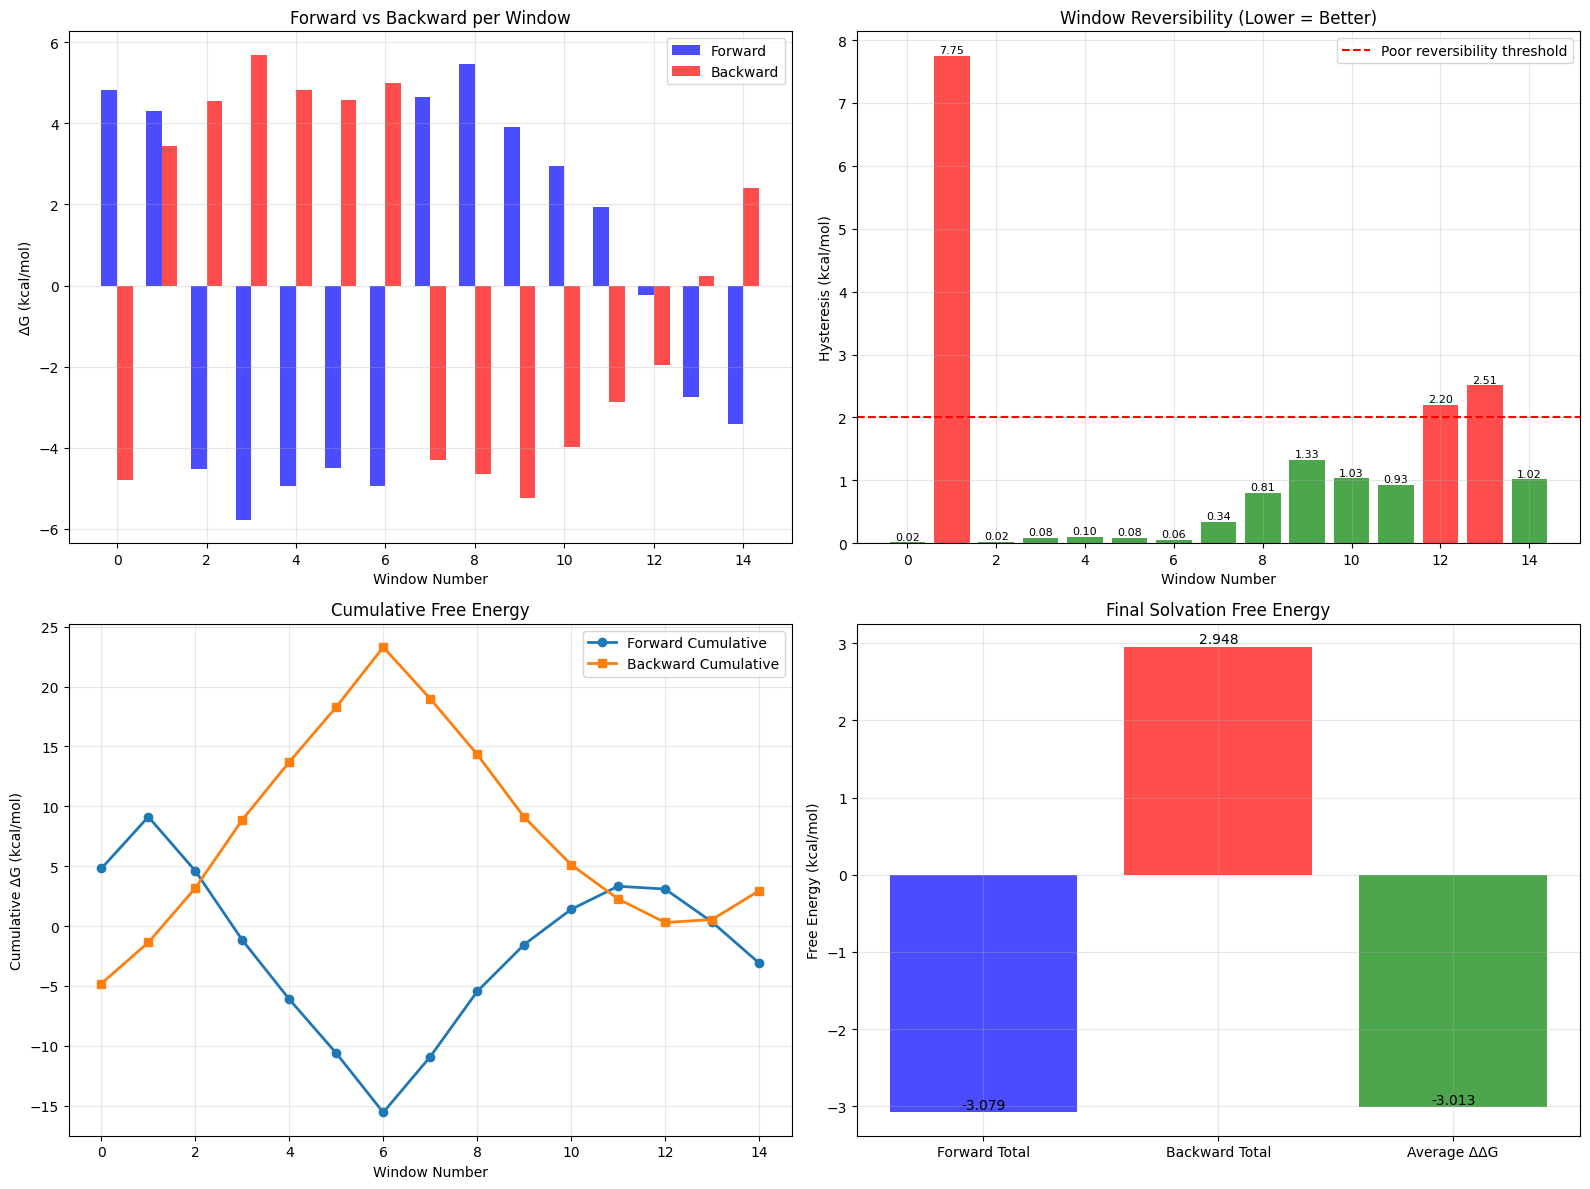


⚠️  PROBLEMATIC WINDOWS (Hysteresis > 2.0):
  Window 1: Hysteresis = 7.750
  Window 12: Hysteresis = 2.199
  Window 13: Hysteresis = 2.510

✅ WELL-BEHAVED WINDOWS (Hysteresis < 2.0):
  Window 0: Hysteresis = 0.015
  Window 2: Hysteresis = 0.022
  Window 3: Hysteresis = 0.084
  Window 4: Hysteresis = 0.104
  Window 5: Hysteresis = 0.082
  Window 6: Hysteresis = 0.055
  Window 7: Hysteresis = 0.343
  Window 8: Hysteresis = 0.806
  Window 9: Hysteresis = 1.327
  Window 10: Hysteresis = 1.031
  Window 11: Hysteresis = 0.930
  Window 14: Hysteresis = 1.018

🔬 FINAL RESULT:
Solvent ΔΔG = -3.013 kcal/mol
Data Quality: 12/15 windows well-behaved
Error Estimate: ±0.065 kcal/mol


In [16]:
#@title Plot which windows do not repeated well
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root_scalar

# DEFINE YOUR PATH HERE
path = "/content/drive/MyDrive/NAMD-FEP/charmm-gui-6195586660/namd/1-2/ligand"

print(f"📁 Reading from: {path}")

def extract_final_dG(filename):
    """Extract the final cumulative ΔG from the last line"""
    with open(filename, 'r') as f:
        for line in f:
            if 'Free energy change for lambda window' in line:
                parts = line.split()
                for i, part in enumerate(parts):
                    if part == 'is':
                        return float(parts[i + 1])
    return 0.0

def extract_energy_differences(filename):
    """Extract energy differences (dE column) for BAR analysis"""
    dE_values = []
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith('FepEnergy:'):
                parts = line.split()
                if len(parts) >= 8:
                    # Use dE column (column 7) which is E(l+dl) - E(l)
                    dE_values.append(float(parts[7]))
    return dE_values

def bar_analysis(forward_dEs, backward_dEs, temperature=300):
    """Bennett Acceptance Ratio analysis using energy differences"""
    if len(forward_dEs) == 0 or len(backward_dEs) == 0:
        return 0.0

    kT = 0.001987 * temperature

    def bar_equation(C):
        # BAR equation using energy differences
        fwd_sum = np.mean(1.0 / (1.0 + np.exp((np.array(forward_dEs) - C) / kT)))
        bwd_sum = np.mean(1.0 / (1.0 + np.exp(-(np.array(backward_dEs) - C) / kT)))
        return fwd_sum - bwd_sum

    try:
        result = root_scalar(bar_equation, bracket=[-50, 50])
        return result.root
    except:
        # Fallback to simple difference
        return np.mean(forward_dEs) - np.mean(backward_dEs)

# Get all files
forward_files = sorted(glob.glob(os.path.join(path, 'fep_forward_*.fep')))
backward_files = sorted(glob.glob(os.path.join(path, 'fep_backward_*.fep')))

print(f"Found {len(forward_files)} forward files, {len(backward_files)} backward files")

# First, let's just see what data we're extracting
print("\n🔍 Checking data extraction:")
for i, (fwd_file, bwd_file) in enumerate(zip(forward_files, backward_files)):
    fwd_dEs = extract_energy_differences(fwd_file)
    bwd_dEs = extract_energy_differences(bwd_file)
    fwd_final = extract_final_dG(fwd_file)
    bwd_final = extract_final_dG(bwd_file)

    print(f"Window {i}:")
    print(f"  Forward: {len(fwd_dEs)} dE points, final ΔG = {fwd_final:.3f}")
    print(f"  Backward: {len(bwd_dEs)} dE points, final ΔG = {bwd_final:.3f}")
    if len(fwd_dEs) > 0:
        print(f"  Forward dE range: {np.min(fwd_dEs):.3f} to {np.max(fwd_dEs):.3f}")
    if len(bwd_dEs) > 0:
        print(f"  Backward dE range: {np.min(bwd_dEs):.3f} to {np.max(bwd_dEs):.3f}")

# Now do the analysis with final ΔG values (more reliable)
print(f"\n📊 ANALYSIS USING FINAL ΔG VALUES:")

forward_finals = []
backward_finals = []

for i, (fwd_file, bwd_file) in enumerate(zip(forward_files, backward_files)):
    fwd_final = extract_final_dG(fwd_file)
    bwd_final = extract_final_dG(bwd_file)

    forward_finals.append(fwd_final)
    backward_finals.append(bwd_final)

    hysteresis = abs(fwd_final + bwd_final)
    reversibility = "GOOD" if hysteresis < 2.0 else "POOR"

    print(f"Window {i:2d}: Forward={fwd_final:7.3f}, Backward={bwd_final:7.3f}, Hysteresis={hysteresis:5.3f} ({reversibility})")

# Calculate overall results
total_forward = sum(forward_finals)
total_backward = sum(backward_finals)
average_dG = (total_forward - total_backward) / 2
avg_hysteresis = np.mean([abs(f + b) for f, b in zip(forward_finals, backward_finals)])

print(f"\n🎯 OVERALL RESULTS:")
print(f"Forward total:  {total_forward:.3f} kcal/mol")
print(f"Backward total: {total_backward:.3f} kcal/mol")
print(f"Average ΔΔG:    {average_dG:.3f} kcal/mol")
print(f"Avg Hysteresis: {avg_hysteresis:.3f} kcal/mol")

# Create plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Forward vs Backward per window
windows = np.arange(len(forward_finals))
width = 0.35
ax1.bar(windows - width/2, forward_finals, width, label='Forward', color='blue', alpha=0.7)
ax1.bar(windows + width/2, backward_finals, width, label='Backward', color='red', alpha=0.7)
ax1.set_xlabel('Window Number')
ax1.set_ylabel('ΔG (kcal/mol)')
ax1.set_title('Forward vs Backward per Window')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Hysteresis
hysteresis_vals = [abs(f + b) for f, b in zip(forward_finals, backward_finals)]
colors = ['green' if h < 2.0 else 'red' for h in hysteresis_vals]
bars = ax2.bar(windows, hysteresis_vals, color=colors, alpha=0.7)
ax2.axhline(y=2.0, color='red', linestyle='--', label='Poor reversibility threshold')
ax2.set_xlabel('Window Number')
ax2.set_ylabel('Hysteresis (kcal/mol)')
ax2.set_title('Window Reversibility (Lower = Better)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add value labels
for bar, h in zip(bars, hysteresis_vals):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{h:.2f}', ha='center', va='bottom', fontsize=8)

# Plot 3: Cumulative free energy
cumulative_forward = np.cumsum(forward_finals)
cumulative_backward = np.cumsum(backward_finals)
ax3.plot(windows, cumulative_forward, 'o-', label='Forward Cumulative', linewidth=2)
ax3.plot(windows, cumulative_backward, 's-', label='Backward Cumulative', linewidth=2)
ax3.set_xlabel('Window Number')
ax3.set_ylabel('Cumulative ΔG (kcal/mol)')
ax3.set_title('Cumulative Free Energy')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Final summary
methods = ['Forward Total', 'Backward Total', 'Average ΔΔG']
values = [total_forward, total_backward, average_dG]
colors = ['blue', 'red', 'green']
bars = ax4.bar(methods, values, color=colors, alpha=0.7)
ax4.set_ylabel('Free Energy (kcal/mol)')
ax4.set_title('Final Solvation Free Energy')
ax4.grid(True, alpha=0.3)

# Add value labels
for bar, v in zip(bars, values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print problematic windows
print(f"\n⚠️  PROBLEMATIC WINDOWS (Hysteresis > 2.0):")
problematic = [(i, abs(f+b)) for i, (f, b) in enumerate(zip(forward_finals, backward_finals)) if abs(f+b) > 2.0]
for i, h in problematic:
    print(f"  Window {i}: Hysteresis = {h:.3f}")

print(f"\n✅ WELL-BEHAVED WINDOWS (Hysteresis < 2.0):")
good = [(i, abs(f+b)) for i, (f, b) in enumerate(zip(forward_finals, backward_finals)) if abs(f+b) <= 2.0]
for i, h in good:
    print(f"  Window {i}: Hysteresis = {h:.3f}")

print(f"\n🔬 FINAL RESULT:")
print(f"Solvent ΔΔG = {average_dG:.3f} kcal/mol")
print(f"Data Quality: {len(good)}/{len(forward_finals)} windows well-behaved")
print(f"Error Estimate: ±{abs(total_forward + total_backward)/2:.3f} kcal/mol")

📁 Reading from: /content/drive/MyDrive/NAMD-FEP/charmm-gui-6195586660/namd/1-2/ligand
Found 15 forward files, 15 backward files

📊 EXTRACTING FINAL ΔG VALUES:
Window  0: Forward =   4.814, Backward =  -4.799
Window  1: Forward =   4.315, Backward =   3.436
Window  2: Forward =  -4.524, Backward =   4.546
Window  3: Forward =  -5.778, Backward =   5.694
Window  4: Forward =  -4.938, Backward =   4.833
Window  5: Forward =  -4.503, Backward =   4.586
Window  6: Forward =  -4.951, Backward =   5.006
Window  7: Forward =   4.653, Backward =  -4.310
Window  8: Forward =   5.452, Backward =  -4.646
Window  9: Forward =   3.917, Backward =  -5.245
Window 10: Forward =   2.941, Backward =  -3.972
Window 11: Forward =   1.928, Backward =  -2.859
Window 12: Forward =  -0.230, Backward =  -1.970
Window 13: Forward =  -2.752, Backward =   0.242
Window 14: Forward =  -3.423, Backward =   2.405

🎯 RESULTS:
Forward total:  -3.079 kcal/mol
Backward total: 2.948 kcal/mol
Average ΔΔG:    -3.013 kcal/mol

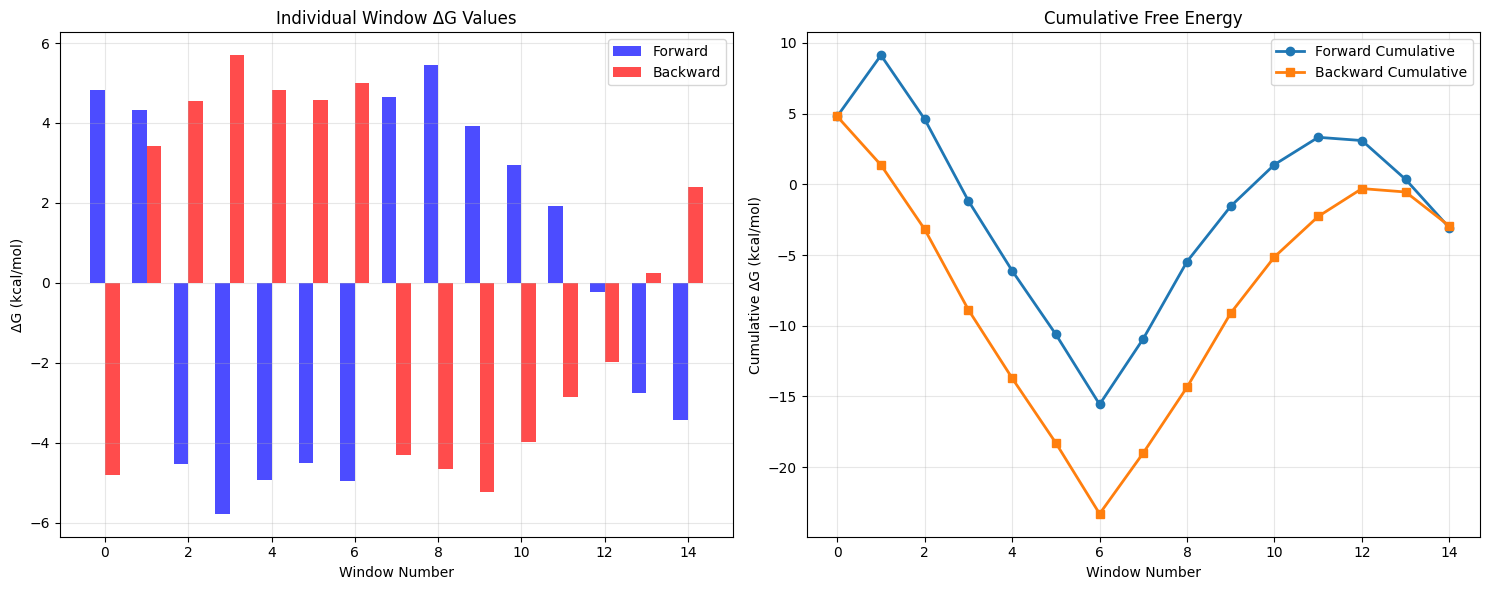


🔬 FINAL SOLVENT ΔΔG = -3.013 kcal/mol


In [20]:
#@title Compare the forward and backward curve
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# DEFINE YOUR PATH HERE
path = "/content/drive/MyDrive/NAMD-FEP/charmm-gui-6195586660/namd/1-2/ligand"

print(f"📁 Reading from: {path}")

# Get all files
forward_files = sorted(glob.glob(os.path.join(path, 'fep_forward_*.fep')))
backward_files = sorted(glob.glob(os.path.join(path, 'fep_backward_*.fep')))

print(f"Found {len(forward_files)} forward files, {len(backward_files)} backward files")

# SIMPLE ANALYSIS - JUST READ THE FINAL ΔG VALUES
print("\n📊 EXTRACTING FINAL ΔG VALUES:")

forward_finals = []
backward_finals = []

for i, (fwd_file, bwd_file) in enumerate(zip(forward_files, backward_files)):
    # Read forward file
    with open(fwd_file, 'r') as f:
        fwd_content = f.read()
        if 'Free energy change for lambda window' in fwd_content:
            lines = fwd_content.split('\n')
            for line in lines:
                if 'Free energy change for lambda window' in line:
                    parts = line.split()
                    for j, part in enumerate(parts):
                        if part == 'is':
                            fwd_final = float(parts[j + 1])
                            forward_finals.append(fwd_final)
                            break
                    break

    # Read backward file
    with open(bwd_file, 'r') as f:
        bwd_content = f.read()
        if 'Free energy change for lambda window' in bwd_content:
            lines = bwd_content.split('\n')
            for line in lines:
                if 'Free energy change for lambda window' in line:
                    parts = line.split()
                    for j, part in enumerate(parts):
                        if part == 'is':
                            bwd_final = float(parts[j + 1])
                            backward_finals.append(bwd_final)
                            break
                    break

    print(f"Window {i:2d}: Forward = {fwd_final:7.3f}, Backward = {bwd_final:7.3f}")

# Calculate results
total_forward = sum(forward_finals)
total_backward = sum(backward_finals)
average_dG = (total_forward - total_backward) / 2

print(f"\n🎯 RESULTS:")
print(f"Forward total:  {total_forward:.3f} kcal/mol")
print(f"Backward total: {total_backward:.3f} kcal/mol")
print(f"Average ΔΔG:    {average_dG:.3f} kcal/mol")

# Create simple bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Individual windows
windows = np.arange(len(forward_finals))
width = 0.35
ax1.bar(windows - width/2, forward_finals, width, label='Forward', color='blue', alpha=0.7)
ax1.bar(windows + width/2, backward_finals, width, label='Backward', color='red', alpha=0.7)
ax1.set_xlabel('Window Number')
ax1.set_ylabel('ΔG (kcal/mol)')
ax1.set_title('Individual Window ΔG Values')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative
cumulative_forward = np.cumsum(forward_finals)
cumulative_backward = np.cumsum([-b for b in backward_finals])  # Backward is opposite direction

ax2.plot(windows, cumulative_forward, 'o-', label='Forward Cumulative', linewidth=2)
ax2.plot(windows, cumulative_backward, 's-', label='Backward Cumulative', linewidth=2)
ax2.set_xlabel('Window Number')
ax2.set_ylabel('Cumulative ΔG (kcal/mol)')
ax2.set_title('Cumulative Free Energy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final result
print(f"\n🔬 FINAL SOLVENT ΔΔG = {average_dG:.3f} kcal/mol")